# Discrete Random Fields
This is a toy example on analyzing discrete random fields using nonparametric models. Reproducting the chapter 3.6.2 of Pöthkow, „Modeling, Quantification and Visualization of Probabilistic Features in Fields with Uncertainties“.

In [32]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import netCDF4 as nc
import pandas as pd
from pandas.plotting import parallel_coordinates
from scipy import stats

Let $Y_1,Y_2$ be two points of a discretized scalar field and an ensemble of the size $L = 50$ realizations.

In [50]:
y1 = np.hstack((np.random.normal(1, 1, 25), np.random.normal(-1, 1, 25)))
y2 = np.hstack((np.random.normal(1, 1, 25), np.random.normal(-1, 1, 25)))

[0.89925456 3.10161869]


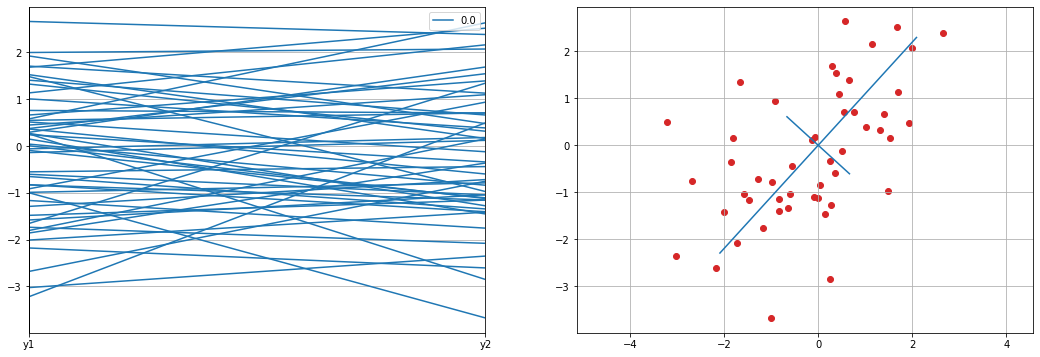

In [71]:
c = np.zeros_like(y1)

df = pd.DataFrame(data=np.transpose([y1,y2,c]), columns=['y1', 'y2', 'Class'])

covariance = np.cov(np.vstack([y1,y2]))
evals, evecs = np.linalg.eig(covariance)

x_v1, y_v1 = evecs[:,0].flatten()
x_v2, y_v2 = evecs[:,1].flatten()

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
parallel_coordinates(df, 'Class', color='tab:blue', axvlines=True)

ax2 = plt.subplot(1,2,2)
plt.scatter(y1, y2, c='tab:red')
plt.grid()
plt.axis('equal')
plt.plot([x_v1*-evals[0], x_v1*evals[0]], [y_v1*-evals[0], y_v1*evals[0]], color='tab:blue')
plt.plot([x_v2*-evals[1], x_v2*evals[1]], [y_v2*-evals[1], y_v2*evals[1]], color='tab:blue')

plt.show()

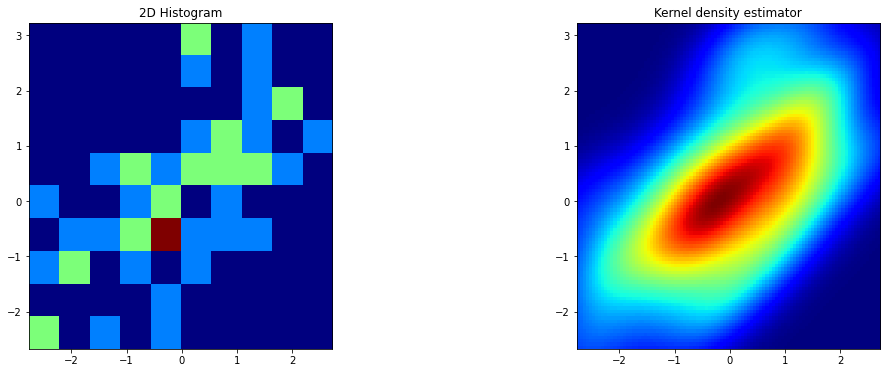

In [38]:
H, xedges, yedges = np.histogram2d(y1, y2)

xmin = y1.min()
xmax = y1.max()
ymin = y2.min()
ymax = y2.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([X.ravel(), Y.ravel()])
kernel = stats.gaussian_kde(np.vstack([y1,y2]), bw_method='scott')
Z = np.reshape(kernel(positions).T, X.shape)

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.title('2D Histogram')
plt.imshow(np.rot90(H), cmap='jet', extent=[xmin, xmax, ymin, ymax])

plt.subplot(1,2,2)
plt.title('Kernel density estimator')
plt.imshow(np.rot90(Z), cmap='jet', extent=[xmin, xmax, ymin, ymax])

plt.show()

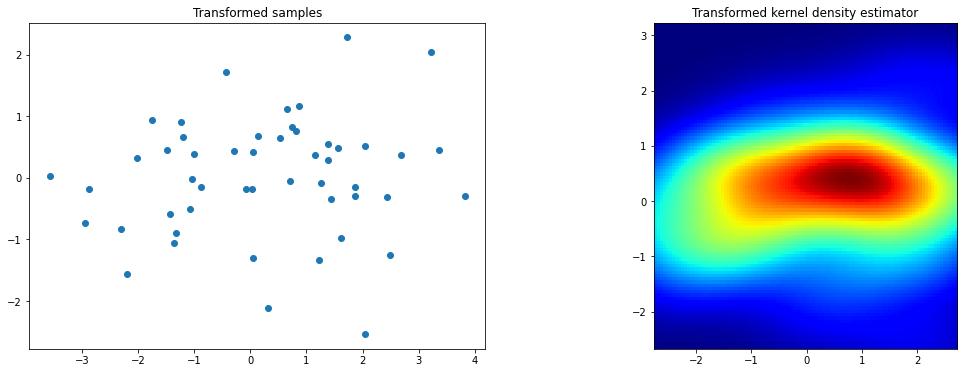

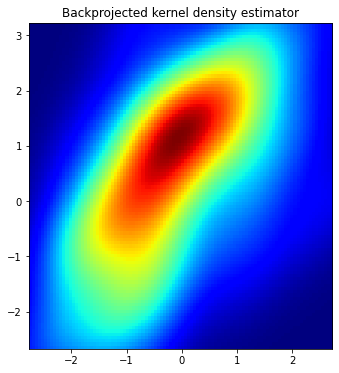

In [124]:
points_transformed = np.vstack([y1,y2]).T @ evecs.T

positions_transformed = np.vstack([X.ravel(), Y.ravel()])
kernel = stats.gaussian_kde(points_transformed.T, bw_method='scott')
Z_transformed = np.reshape(kernel(positions_transformed).T, X.shape)
positions = positions_transformed.T @ evecs

Z = np.reshape(kernel(positions.T).T, X.shape)

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Transformed samples')
plt.scatter(points_transformed[:,0], points_transformed[:,1])

plt.subplot(1,2,2)
plt.title('Transformed kernel density estimator')
plt.imshow(np.rot90(Z_transformed), cmap='jet', extent=[xmin, xmax, ymin, ymax])
plt.show()

plt.figure(figsize=(18,6))
plt.title('Backprojected kernel density estimator')
plt.imshow(Z, cmap='jet', extent=[xmin, xmax, ymin, ymax])
plt.show()